In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv("../data/train.csv", index_col = 0)
test_df = pd.read_csv("../data/test.csv", index_col = 0)

In [3]:
#import pandas_profiling as ppf
#ppf.ProfileReport(train_df)

In [4]:
train_df.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255


In [5]:
test_df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
id,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


array([[<AxesSubplot:title={'center':'trip_duration'}>,
        <AxesSubplot:title={'center':'log(trip_duration + 1)'}>]],
      dtype=object)

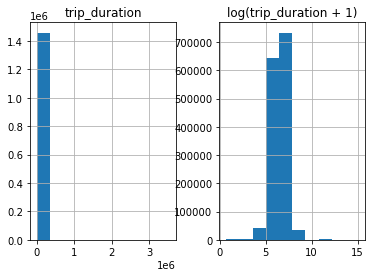

In [6]:
%matplotlib inline
trip_duration = pd.DataFrame({"trip_duration":train_df["trip_duration"], "log(trip_duration + 1)":np.log1p(train_df["trip_duration"])})
trip_duration.hist()

In [7]:
y_train = np.log1p(train_df.pop('trip_duration'))

In [8]:
train_df.pop("dropoff_datetime")

id
id2875421    2016-03-14 17:32:30
id2377394    2016-06-12 00:54:38
id3858529    2016-01-19 12:10:48
id3504673    2016-04-06 19:39:40
id2181028    2016-03-26 13:38:10
                    ...         
id2376096    2016-04-08 13:44:02
id1049543    2016-01-10 07:46:10
id2304944    2016-04-22 07:10:25
id2714485    2016-01-05 16:02:39
id1209952    2016-04-05 14:47:43
Name: dropoff_datetime, Length: 1458644, dtype: object

In [9]:
#train_df.shape, test_df.shape

In [10]:
all_df = pd.concat((train_df,test_df), axis=0)

In [11]:
all_df['vendor_id'].value_counts()
all_df['pickup_datetime'] = all_df['pickup_datetime'].astype(str)
all_df['vendor_id'] = all_df['vendor_id'].astype(str)

In [12]:
all_df["pickup_datetime"]

id
id2875421    2016-03-14 17:24:55
id2377394    2016-06-12 00:43:35
id3858529    2016-01-19 11:35:24
id3504673    2016-04-06 19:32:31
id2181028    2016-03-26 13:30:55
                    ...         
id3008929    2016-01-01 00:02:52
id3700764    2016-01-01 00:01:52
id2568735    2016-01-01 00:01:24
id1384355    2016-01-01 00:00:28
id0621643    2016-01-01 00:00:22
Name: pickup_datetime, Length: 2083778, dtype: object

In [13]:
new_cols = all_df['pickup_datetime'].str.split(' ', 2, True)

In [14]:
new_cols.columns = ["date", "time"]

In [15]:
new_cols

,date,time
id,,
id2875421,2016-03-14,17:24:55
id2377394,2016-06-12,00:43:35
id3858529,2016-01-19,11:35:24
id3504673,2016-04-06,19:32:31
id2181028,2016-03-26,13:30:55
...,...,...
id3008929,2016-01-01,00:02:52
id3700764,2016-01-01,00:01:52
id2568735,2016-01-01,00:01:24


In [16]:
all_df.pop("pickup_datetime")

id
id2875421    2016-03-14 17:24:55
id2377394    2016-06-12 00:43:35
id3858529    2016-01-19 11:35:24
id3504673    2016-04-06 19:32:31
id2181028    2016-03-26 13:30:55
                    ...         
id3008929    2016-01-01 00:02:52
id3700764    2016-01-01 00:01:52
id2568735    2016-01-01 00:01:24
id1384355    2016-01-01 00:00:28
id0621643    2016-01-01 00:00:22
Name: pickup_datetime, Length: 2083778, dtype: object

In [17]:
new_time = new_cols["time"].str.split(':', 3, True)

In [18]:
new_time.columns = ["hour","minute","second"]

In [19]:
new_time

,hour,minute,second
id,,,
id2875421,17,24,55
id2377394,00,43,35
id3858529,11,35,24
id3504673,19,32,31
id2181028,13,30,55
...,...,...,...
id3008929,00,02,52
id3700764,00,01,52
id2568735,00,01,24


In [20]:
new_date = new_cols["date"].str.split('-', 3, True)
new_date.columns = ["year","month","day"]

In [21]:
new_date, new_time

(           year month day
 id                       
 id2875421  2016    03  14
 id2377394  2016    06  12
 id3858529  2016    01  19
 id3504673  2016    04  06
 id2181028  2016    03  26
 ...         ...   ...  ..
 id3008929  2016    01  01
 id3700764  2016    01  01
 id2568735  2016    01  01
 id1384355  2016    01  01
 id0621643  2016    01  01
 
 [2083778 rows x 3 columns],           hour minute second
 id                          
 id2875421   17     24     55
 id2377394   00     43     35
 id3858529   11     35     24
 id3504673   19     32     31
 id2181028   13     30     55
 ...        ...    ...    ...
 id3008929   00     02     52
 id3700764   00     01     52
 id2568735   00     01     24
 id1384355   00     00     28
 id0621643   00     00     22
 
 [2083778 rows x 3 columns])

In [22]:
all_df.pop("vendor_id")
all_df.pop("passenger_count")
all_df.pop("pickup_longitude")
all_df.pop("dropoff_longitude")
all_df.pop("store_and_fwd_flag")

id
id2875421    N
id2377394    N
id3858529    N
id3504673    N
id2181028    N
            ..
id3008929    N
id3700764    N
id2568735    N
id1384355    N
id0621643    N
Name: store_and_fwd_flag, Length: 2083778, dtype: object

In [23]:
all_df.isnull().sum().sort_values(ascending=False).head(10) #无缺失值

dropoff_latitude    0
pickup_latitude     0
dtype: int64

In [24]:
#all_df['store_and_fwd_flag'].dtypes

In [25]:
#all_df_pt = pd.concat((all_df,new_time), axis=1)

In [26]:
#all_df_pt = pd.concat((all_df,new_date), axis=1)

In [27]:
#all_df_pt.pop("year")

In [28]:
#all_df_pt

In [29]:
#all_new_datetime = pd.concat((new_date,new_time), axis=1)

In [30]:
#all_new_datetime

In [31]:
#all_df_pt = pd.concat((all_df,all_new_datetime), axis=1)

In [32]:
#all_df_pt

In [33]:
#all_df_pt.pop('year')

In [34]:
#all_df_pt['month'].dtype

In [35]:
#all_df_pt['month'] = all_df_pt['month'].astype(str)
#all_df_pt['month'].value_counts()

In [36]:
#pd.get_dummies(all_df_pt['month'], prefix='month').head()
#all_dummy_df = pd.get_dummies(all_df_pt)
#all_dummy_df.head()

In [37]:
all_df

,pickup_latitude,dropoff_latitude
id,,
id2875421,40.767937,40.765602
id2377394,40.738564,40.731152
id3858529,40.763939,40.710087
id3504673,40.719971,40.706718
id2181028,40.793209,40.782520
...,...,...
id3008929,40.725105,40.733643
id3700764,40.743782,40.782467
id2568735,40.759865,40.748665


In [38]:
#标准化数据
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['pickup_latitude', 'dropoff_latitude'], dtype='object')

In [39]:
all_dummy_df=all_df
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [40]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [41]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

Ridge回归

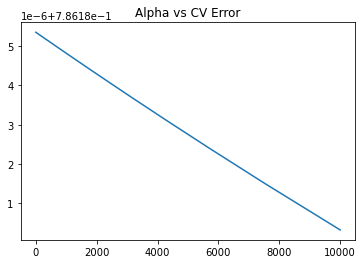

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-2, 4, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
import matplotlib.pyplot as plt
%matplotlib inline
#my_y_ticks = np.arange(0, 1, 1e-8)
#plt.yticks(my_y_ticks)
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

随机树

In [43]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# max_features = [.1, .3, .5, .7, .9, .99]
# test_scores = []
# for max_feat in max_features:
#     clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
#     test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
#     test_scores.append(np.mean(test_score))
# plt.plot(max_features, test_scores)
# plt.title("Max Features vs CV Error");

XGB

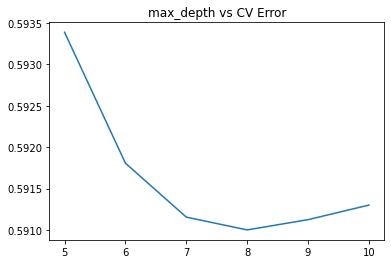

In [44]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
params = [5,6,7,8,9,10]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error");

Bagging把很多的小分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票制）
决策树

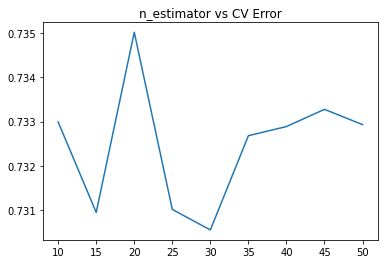

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

#### Boosting
Boosting比Bagging理论上更高级点，它也是揽来一把的分类器。但是把他们线性排列。下一个分类器把上一个分类器分类得不好的地方加上更高的权重

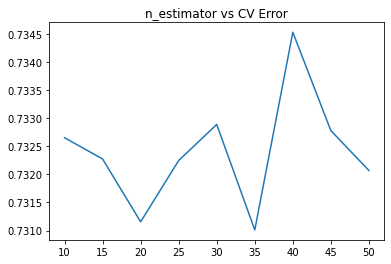

In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf =AdaBoostRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [50]:
clf = XGBRegressor(max_depth=8)
clf.fit(X_train,y_train)
y_reslut = np.expm1(clf.predict(X_test))

In [52]:
submission_df = pd.DataFrame(data= {'id' : test_df.index, 'trip_duration': y_reslut})

In [53]:
submission_df

,id,trip_duration
0,id3004672,805.606750
1,id3505355,634.686646
2,id1217141,411.860168
3,id2150126,1210.004517
4,id1598245,468.200226
...,...,...
625129,id3008929,408.335052
625130,id3700764,1031.720581
625131,id2568735,566.284424
625132,id1384355,2157.403320


In [69]:
import csv
submission_df.to_csv('results.csv',index = False)